In [7]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
%matplotlib inline

In [8]:
PATH = "C:\\Users\\Raphaela Edler\\Documents\\GIT\\SoSe 2021\\Fernerkundung\\Uebungen\\E4\\" 
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20181016T101021_N0209_R022_T33UVS_20181016T131706_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2A_MSIL2A_20190921T101031_N0213_R022_T33UVS_20190921T130515_resampled_wt.nc"
FILENAME_REF_2018 = "referenceData2018.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 =  xr.open_dataset(PATH + FILENAME_2018)
data2019 =  xr.open_dataset(PATH + FILENAME_2019)
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019

In [ ]:
data2018

In [10]:
#Daten konvertieren zu Datenframe
df2018 = data2018.to_dataframe()
print(df2018.shape)
#df2018.sample(20)

(9588425, 47)


In [11]:
#Formel für NDVI
def NDVI(df2018):
    df2018['NDVI']=(df2018.B8 - df2018.B4)/(df2018.B8 + df2018.B4)  # Hinzufügen des neuen Bandes NDVI zum Datensatz

In [12]:
#NDVI
NDVI(df2018)

In [13]:
def plotting(df2018,vmin='NULL',vmax='NULL',cmap='NULL',title='NULL'):
    fig, ax = plt.subplots(figsize=(12,10))
    df2018.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.tight_layout();
    title=title
    plt.title(title, fontsize=22) 

In [ ]:
#NDVI plotten
plotting (df2018.NDVI,vmin=-0.2,vmax=0.8, cmap='BrBG', title='NDVI von 2018')

In [15]:
# Formel für BRI
def BRI (df2018):
    df2018 ['BRI'] = (1/1550)  - (1/700) / df2018.B8

In [16]:
#BRI
BRI(df2018)

In [ ]:
#BRI plotten
plotting (df2018.BRI,vmin=-1,vmax=1, cmap='BrBG', title='BRI von 2018')

In [19]:
#Formel für GVI
def GVI(df2018):
    df2018['GVI'] = -0.2848 * df2018.B2 - 0.24 * df2018.B3 - 0.5436 * df2018.B4 + 0.7243 * df2018.B8 + 0.0840 * df2018.B11 - 0.1800 * df2018.B12

In [ ]:
#GVI
GVI(df2018)

In [ ]:
#GVI plotten
plotting (df2018.GVI,vmin=-0.2,vmax=0.8, cmap='BrBG', title='GVI von 2018')

In [61]:
#Formel für WET
def WET(df2018):
    df2018['WET'] = 0.1509 * df2018.B2 +0.1973 * df2018.B3 + 0.3279 * df2018.B4 + 0.3406 * df2018.B8 - 0.7112 * df2018.B11 - 0.4572 * df2018.B12

In [ ]:
#WET
WET (df2018)

In [ ]:
#WET plotten
plotting (df2018.WET,vmin=-0.2,vmax=0.8, cmap='BrBG', title='WET von 2018')

In [1]:
#UNSUPERVISED CLASSIFICATION

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'subset_0_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds = xr.open_dataset(PATH+FILENAME)  # loading dataset

In [ ]:
ds

In [ ]:
#First, we reduce our dataset so that just the spectral bands are used for our analysis.

ds_reduced = ds[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
ds_reduced

In [6]:
#Formel für NDVI
def NDVI(ds_reduced):
    ds_reduced['NDVI']=(ds_reduced.B8 - ds_reduced.B4)/(ds_reduced.B8 + ds_reduced.B4)  # Hinzufügen des neuen Bandes NDVI zum Datensatz

In [7]:
#NDVI
NDVI(ds_reduced)

In [8]:
def plotting(ds,vmin='NULL',vmax='NULL',cmap='NULL',title='NULL'):
    fig, ax = plt.subplots(figsize=(12,10))
    ds.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.tight_layout();
    title=title
    plt.title(title, fontsize=22) 

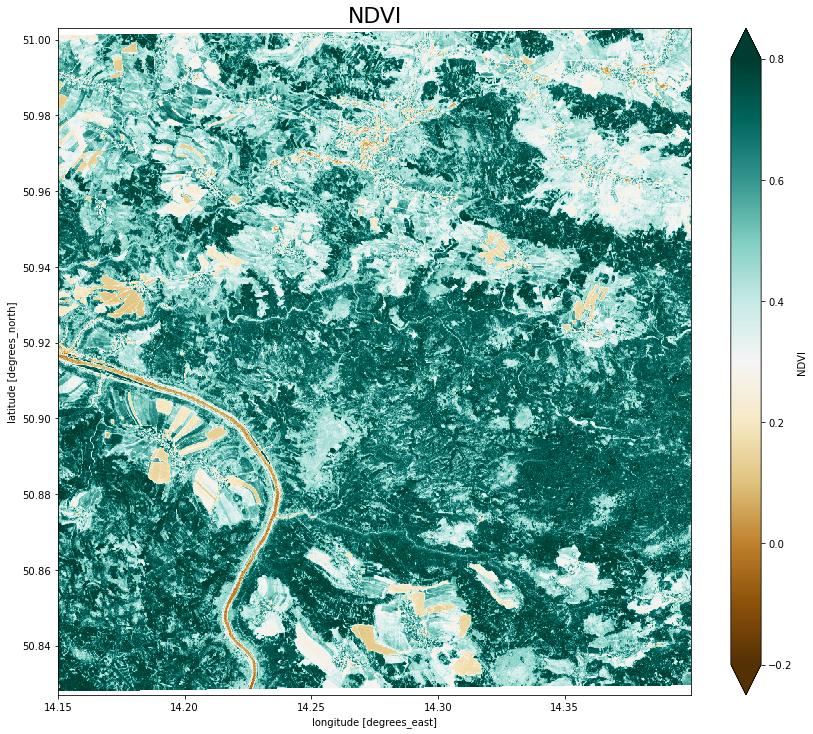

In [9]:
plotting(ds_reduced.NDVI,vmin=-0.2,vmax=0.8, cmap='BrBG',title='NDVI')

In [10]:
# Formel für BRI
def BRI (ds_reduced):
    ds_reduced['BRI'] = (1/1550)  - (1/700) / ds_reduced.B8

In [11]:
#BRI
BRI(ds_reduced)

In [ ]:
plotting(ds_reduced.BRI,vmin=-0.005,vmax=0.0, cmap='BrBG',title='BRI')

In [13]:
#Formel für GVI
def GVI(ds_reduced):
    ds_reduced['GVI'] = -0.2848 * ds_reduced.B2 - 0.24 * ds_reduced.B3 - 0.5436 * ds_reduced.B4 + 0.7243 * ds_reduced.B8 + 0.0840 * ds_reduced.B11 - 0.1800 * ds_reduced.B12

In [14]:
#GVI
GVI(ds_reduced)

In [15]:
#Formel für WET
def WET(ds_reduced):
    ds_reduced['WET'] = 0.1509 * ds_reduced.B2 +0.1973 * ds_reduced.B3 + 0.3279 * ds_reduced.B4 + 0.3406 * ds_reduced.B8 - 0.7112 * ds_reduced.B11 - 0.4572 * ds_reduced.B12

In [16]:
#WET
WET(ds_reduced)

In [ ]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df = ds_reduced.to_dataframe()  # converting to pandas dataframe
df

In [18]:
#NANs

df.isnull().values.any()  # check if there are any NaNs
df.isnull().sum().sum()  # counting the NaNs in the whole dataframe, sum across columns and rows

714160

In [19]:
#deleting NANs

df = ds_reduced.to_dataframe().dropna(how='any')
df.isnull().sum().sum()

0

In [20]:
#kmeans clustering

n_clusters = 20 #number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # init k-means model 
kmeans.fit_predict(df) # apply k-means to data 
print(kmeans.labels_)   # show the cluster number for each data point 

[ 8  8 17 ...  8  8  8]


In [21]:
#Copy the dataframe to a new dataframe and add the cluster label for each pixel.

df_cluster = df
df_cluster['KMeanCluster'] = kmeans.labels_  # adding the labels to our dataset


In [ ]:
#NEW COLUMN FOR LABELING

df_cluster['ClusterNumber'] = df_cluster.KMeanCluster

df_cluster

In [ ]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

In [24]:
SAVING_FILENAME = "new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

In [25]:
#Defines a function to plot the clustering result as a thematic map

def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL'):  # modifying plotting function to achieve a discrete colorbar
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,10), dpi=100)
    ax.imshow(ds[variable],cmap=cmap, aspect='auto')
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters), fraction=0.042, pad=0.02)

    cbar.set_label('cluster')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    plt.tight_layout()
    plt.title(title, fontsize=22)
    
    #plt.savefig('D:\\E4\\kmeans_clustering_april_new.png')

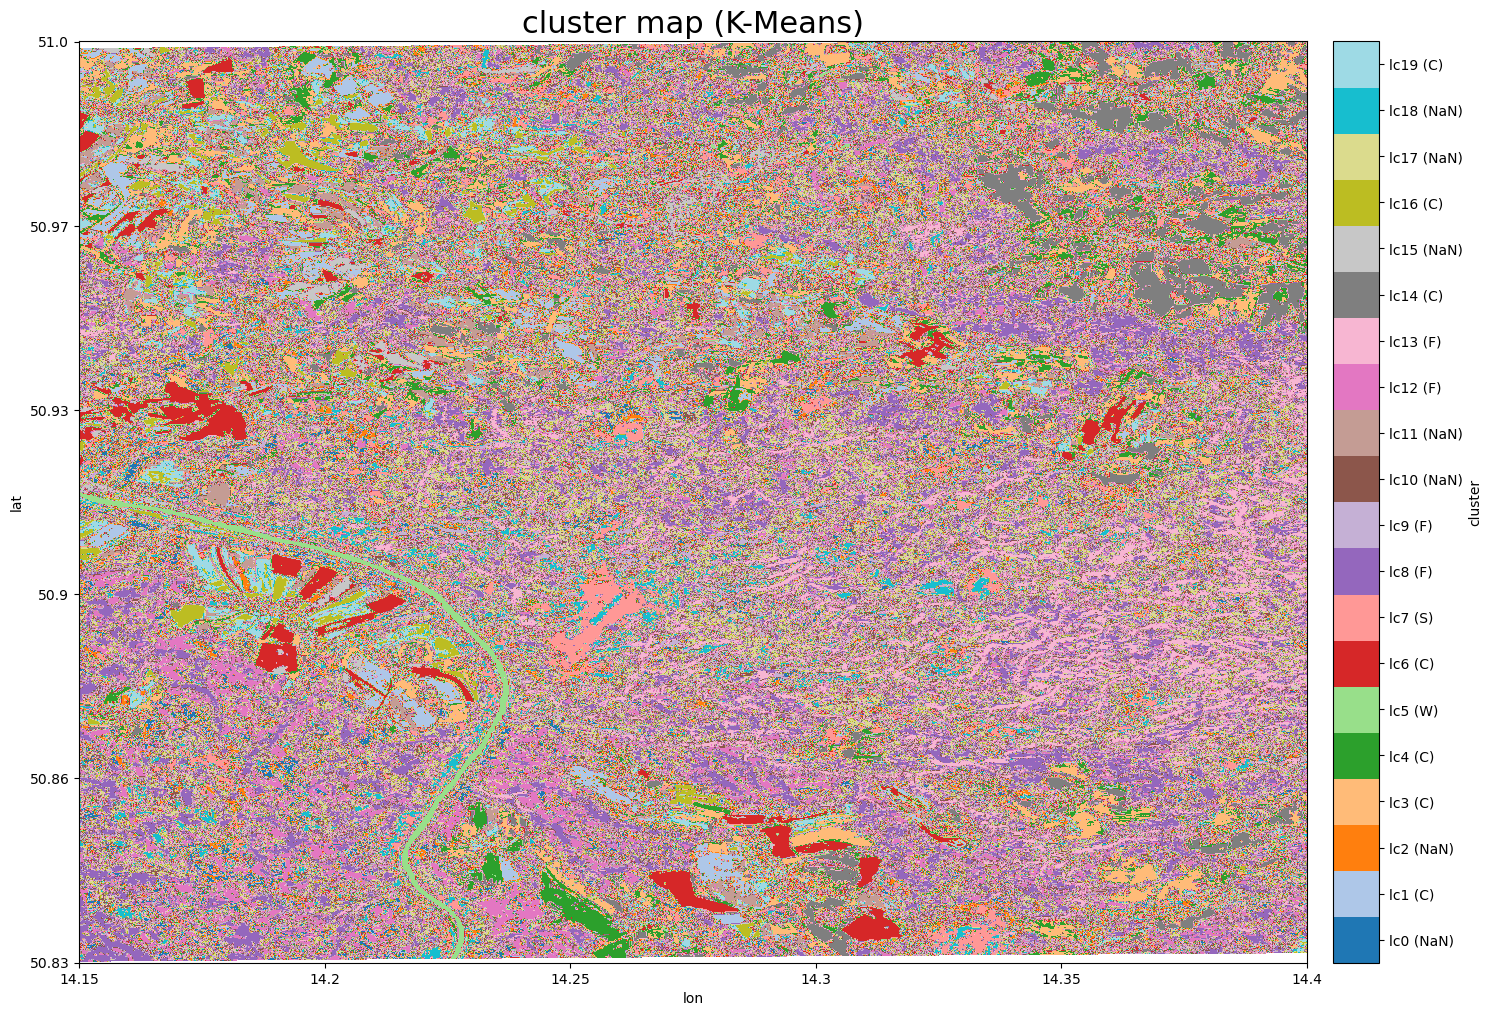

In [27]:
cmap = plt.cm.get_cmap('tab20', n_clusters)  # create colormap
legend_labels = ['lc0 (NaN)', 'lc1 (C)', 'lc2 (NaN)', 'lc3 (C)', 'lc4 (C)', 'lc5 (W)', 'lc6 (C)', 'lc7 (S)', 'lc8 (F)', 'lc9 (F)','lc10 (NaN)', 'lc11 (NaN)', 'lc12 (F)', 'lc13 (F)' , 'lc14 (C)', 'lc15 (NaN)', 'lc16 (C)', 'lc17 (NaN)', 'lc18 (NaN)', 'lc19 (C)']  # define legend labels
title = 'cluster map (K-Means)'  # set figure title

plotting_lc(ds_cluster, variable='KMeanCluster', n_clusters=n_clusters, cmap=cmap, legend_labels=legend_labels,
            title=title)

In [ ]:
#21 = crop, 22 = forest, 23 = water, 24 = soil, NaN = NaN

In [ ]:
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([1,3,4,6,14,16,19],21)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([8,9,12,13],22)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([5],23)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([7],24)
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([0,2,17,10,11,15,18],'NaN')

df_cluster

In [ ]:
index_names = df_cluster[df_cluster['ClusterNumber'] == 'NaN'].index

index_names


In [ ]:
#df_cluster['ClusterNumber'] = df_cluster.to_string(df_cluster['ClusterNumber'])

In [30]:
df_cluster.drop(index_names , inplace=True)

In [ ]:
uniques = df_cluster.ClusterNumber.drop_duplicates()

print(uniques)

In [32]:
df_cluster['ClusterNumber'] = pd.to_numeric(df_cluster['ClusterNumber'],errors = 'coerce')

In [ ]:
df_cluster

In [ ]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

In [35]:
SAVING_FILENAME = "new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

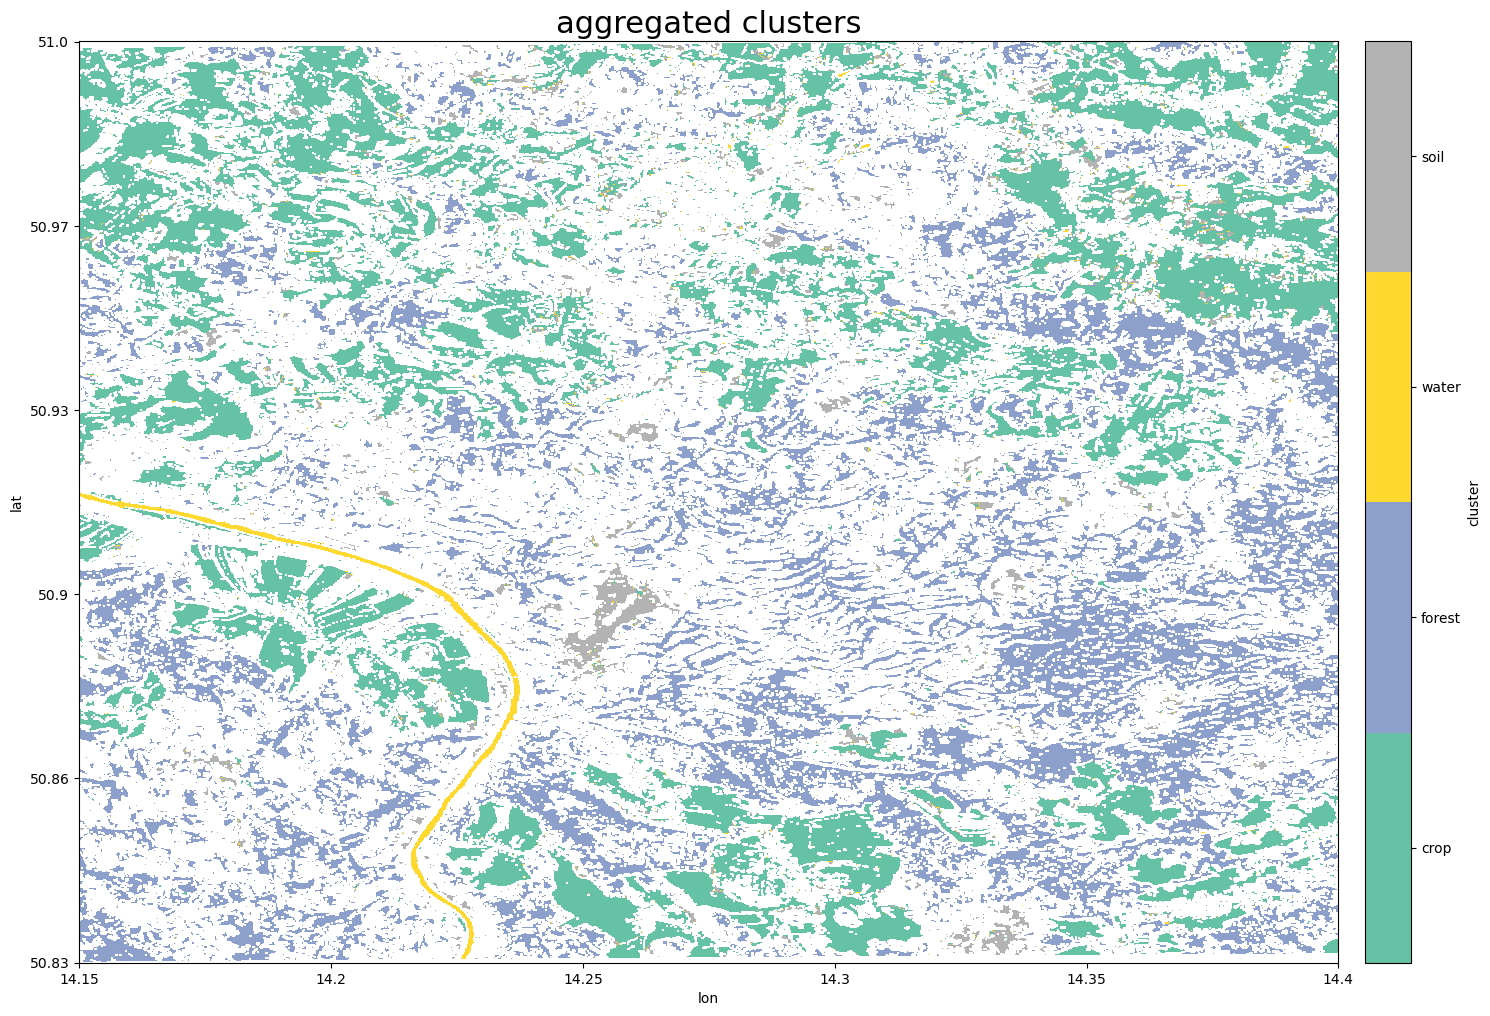

In [39]:
cmap = plt.cm.get_cmap('Set2', 4)  # create colormap
legend_labels = ['crop', 'forest', 'water', 'soil']  # define legend labels
title = 'aggregated clusters'  # set figure title

plotting_lc(ds_cluster, variable='ClusterNumber', n_clusters=4, cmap=cmap, legend_labels=legend_labels,
            title=title)

plt.savefig('D:\\E4\\kmeans_aggregated_clusters.png')

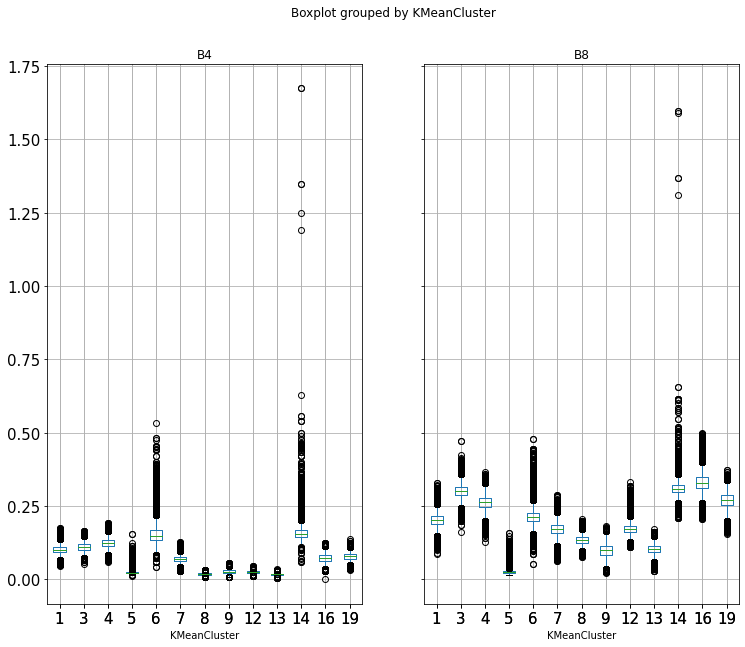

In [40]:
#You can also plot a boxplot to look at the distribution of reflectances in each cluster.

boxplot = df_cluster.boxplot(column=['B4', 'B8'], by='KMeanCluster', figsize=(12,10), fontsize=15)
plt.savefig('D:\\E4\\boxplot_kmeans_clustering_april')

In [ ]:
#JOIN REFERENCE DATA

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [ ]:
#opening the clustered data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds_1 = xr.open_dataset(PATH+FILENAME)

ds_1.KMeanCluster

In [ ]:
#opening the sachsenforst data as reference
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'borkenkaeferbefall2018.nc'
ds_2 = xr.open_dataset(PATH+FILENAME)

ds_2.befall2018

In [ ]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

#df_1 = ds_1.to_dataframe()  # converting to pandas dataframe
#df_2 = ds_2.to_dataframe()

In [ ]:
combined_ds = xr.open_mfdataset(['D:\\E4\\1606\\new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc', 'D:\\E4\\1606\\borkenkaeferbefall2018.nc'],combine = 'by_coords')

combined_ds

In [ ]:
PATH = 'D:\\E4\\1606\\'
SAVING_FILENAME = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
combined_ds.to_netcdf(PATH + SAVING_FILENAME)

In [ ]:
#SUPERVISED CLASSIFICATION

In [ ]:
PATH = 'D:\\E4\\1606\\'
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2B_MSIL2A_20190419T101029_N0211_R022_T33UVS_20190419T132322_resampled_wt.nc"
FILENAME_REF_2018 = "combined_reference_data_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 = PATH + FILENAME_2018
data2019 = PATH + FILENAME_2019
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019